# Prediction Using Supervised Machine Learning

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Visualization of Data

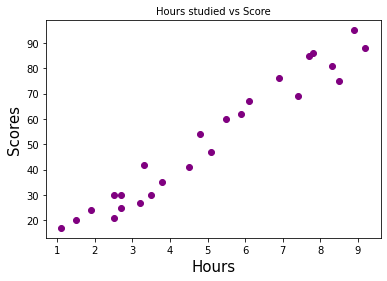

In [4]:
plt.xlabel('Hours',fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.title('Hours studied vs Score', fontsize=10)
plt.scatter(data.Hours,data.Scores,color='purple',marker='o')
plt.show()

The graph indicates a positive linear relationship between scores achieved and number of hours studied

## Data Preprocessing

In [5]:
Y = data["Scores"].values
X = data.drop("Scores", axis=1).values

In [6]:
#splitting the data into training and testing in the ratio 80:20
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 2,test_size=0.2)

In [7]:
print("Training split:", X_train.shape)
print("Testing split:", X_test.shape)

Training split: (20, 1)
Testing split: (5, 1)


## Training the Data

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
# Plotting the regression line for training data
line = lr.coef_*X_train + lr.intercept_

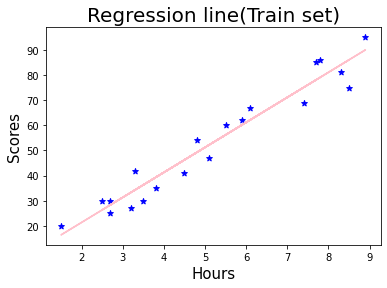

In [10]:
plt.scatter(X_train,Y_train,color='blue',marker='*')
plt.plot(X_train,line,color='pink')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Train set)",fontsize=20)
plt.show()

## Test Data Predictions

In [11]:
#predicting the test data
Y_pred=lr.predict(X_test)

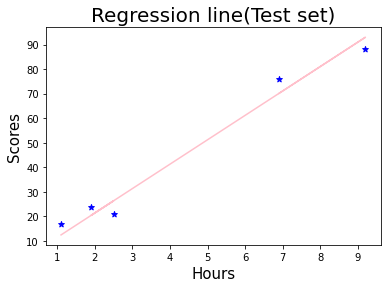

In [12]:
#plotting the test data
plt.plot(X_test,Y_pred,color='pink')
plt.scatter(X_test,Y_test,color='blue',marker='*')
plt.xlabel("Hours",fontsize=15)
plt.ylabel("Scores",fontsize=15)
plt.title("Regression line(Test set)",fontsize=20)
plt.show()

## Comparison between actual and predicted

In [13]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
compare

,Actual,Result
0,17,12.442587
1,21,26.359448
2,24,20.395079
3,88,92.961570
4,76,70.098155


## Evaluating the model

In [14]:
print("Training Score:",lr.score(X_train,Y_train))
print("Test Score:",lr.score(X_test,Y_test))

Training Score: 0.9423348138802985
Test Score: 0.9735538080811826


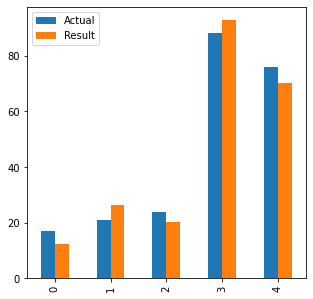

In [15]:
compare.plot(kind='bar',figsize=(5,5))
plt.show()

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 4.877039354964476
Mean Squared Error: 24.387620339856596
Root Mean Squared Error: 4.9383823606376005
R-2: 0.9735538080811826
